# Importando e tratando os dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
dados=pd.read_csv("hotel_bookings.csv")

In [3]:
dados.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
dados.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Faz sentido alterar o nome das colunas para português, já que isso pode facilitar para a equipe que irá utilizar os dados.

In [5]:
dados = dados.rename(columns={'is_canceled': 'se_cancelou', 'lead_time': 'dias_entre_reserva_e_chegada',
                              'arrival_date_year': 'ano_da_viagem', 'arrival_date_month': 'mes_da_viagem',
                              'arrival_date_week_number': 'semana_da_chegada', 'arrival_date_day_of_month': 'dia_da_chegada',
                              'stays_in_weekend_nights': 'no_de_noites_fds', 'stays_in_week_nights': 'no_de_noites_diadesemana',
                              'adults': 'adultos', 'children': 'criancas', 'babies': 'bebes', 'meal': 'refeicao',
                              'country': 'pais', 'market_segment': 'segmento', 'distribution_channel': 'canal_de_distribuicao',
                              'is_repeated_guest': 'se_hospede_recorrente', 'previous_cancellations': 'ja_cancelou',
                              'previous_bookings_not_canceled': 'reservas_anteriores_nao_canceladas',
                              'reserved_room_type': 'tipo_de_quarto', 'assigned_room_type': 'tipo_de_quarto_determinado',
                              'booking_changes': 'no_mudancas_na_reserva', 'deposit_type': 'tipo_de_deposito',
                             'agent': 'agente', 'company': 'companhia', 'days_in_waiting_list': 'dias_na_lista_de_espera',
                             'customer_type': 'tipo_de_reserva', 'adr': 'tarifa_diaria_media', 'required_car_parking_spaces': 'estacionamento',
                             'total_of_special_requests': 'total_de_pedidos_especiais', 'reservation_status': 'status_da_reserva',
                             'reservation_status_date': 'data_do_ultimo_status'})

In [6]:
new_values = {'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril', 'May': 'Maio', 'June': 'Junho',
             'July': 'Julho', 'August': 'Agosto', 'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro',
             'December': 'Dezembro'}
dados['mes_da_viagem'] = dados['mes_da_viagem'].map(new_values)

In [7]:
new_values2 = {'Resort Hotel': 'Resort', 'City Hotel': 'Hotel urbano'}
dados['hotel'] = dados['hotel'].map(new_values2)

### Verificando se existem valores nulos no dataset

In [8]:
dados.isnull().sum()

hotel                                      0
se_cancelou                                0
dias_entre_reserva_e_chegada               0
ano_da_viagem                              0
mes_da_viagem                              0
semana_da_chegada                          0
dia_da_chegada                             0
no_de_noites_fds                           0
no_de_noites_diadesemana                   0
adultos                                    0
criancas                                   4
bebes                                      0
refeicao                                   0
pais                                     488
segmento                                   0
canal_de_distribuicao                      0
se_hospede_recorrente                      0
ja_cancelou                                0
reservas_anteriores_nao_canceladas         0
tipo_de_quarto                             0
tipo_de_quarto_determinado                 0
no_mudancas_na_reserva                     0
tipo_de_de

In [9]:
# vou retirar toda a coluna "companhia", já que não é importante e possui muitos valores nulos

dados.drop(['companhia'], axis=1, inplace=True)

In [10]:
# já no caso das colunas de país e crianças, vou retirar somente as linhas com dados faltantes, não são muitas

dados.dropna(subset=['pais'],inplace=True)
dados.dropna(subset=['criancas'],inplace=True)

In [11]:
# a coluna "agente" irei retirar, pois não é importante para as análises, apesar de conter poucos dados nulos

dados.drop(['agente'], axis=1, inplace=True)

In [12]:
# conferindo se todos os dados nulos foram retirados

dados.isnull().sum()

hotel                                 0
se_cancelou                           0
dias_entre_reserva_e_chegada          0
ano_da_viagem                         0
mes_da_viagem                         0
semana_da_chegada                     0
dia_da_chegada                        0
no_de_noites_fds                      0
no_de_noites_diadesemana              0
adultos                               0
criancas                              0
bebes                                 0
refeicao                              0
pais                                  0
segmento                              0
canal_de_distribuicao                 0
se_hospede_recorrente                 0
ja_cancelou                           0
reservas_anteriores_nao_canceladas    0
tipo_de_quarto                        0
tipo_de_quarto_determinado            0
no_mudancas_na_reserva                0
tipo_de_deposito                      0
dias_na_lista_de_espera               0
tipo_de_reserva                       0


In [13]:
# verificando dados duplicados

dados.duplicated().sum()

31984

In [14]:
# retirando dados duplicados

dados.drop_duplicates(keep = 'first', inplace = True)

In [15]:
# verificando se foram retirados

dados.duplicated().sum()

0

In [16]:
dados.ano_da_viagem.unique()

array([2015, 2016, 2017], dtype=int64)

In [17]:
dados.dtypes

hotel                                  object
se_cancelou                             int64
dias_entre_reserva_e_chegada            int64
ano_da_viagem                           int64
mes_da_viagem                          object
semana_da_chegada                       int64
dia_da_chegada                          int64
no_de_noites_fds                        int64
no_de_noites_diadesemana                int64
adultos                                 int64
criancas                              float64
bebes                                   int64
refeicao                               object
pais                                   object
segmento                               object
canal_de_distribuicao                  object
se_hospede_recorrente                   int64
ja_cancelou                             int64
reservas_anteriores_nao_canceladas      int64
tipo_de_quarto                         object
tipo_de_quarto_determinado             object
no_mudancas_na_reserva            

In [18]:
# vamos transformar o tipo da coluna "criancas" para int

dados['criancas']=dados['criancas'].astype('int64')

In [19]:
# agora vou criar uma coluna nova, que receberá o tamanho total das famílias (número de adultos, mais número de crianças e bebês)

dados['tamanho_da_familia']=dados['adultos']+dados['criancas']+dados['bebes']
dados['total_permacencia']=dados['no_de_noites_fds']+dados['no_de_noites_diadesemana']
dados

,hotel,se_cancelou,dias_entre_reserva_e_chegada,ano_da_viagem,mes_da_viagem,semana_da_chegada,dia_da_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,...,tipo_de_deposito,dias_na_lista_de_espera,tipo_de_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais,status_da_reserva,data_do_ultimo_status,tamanho_da_familia,total_permacencia
0,Resort,0,342,2015,Julho,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
1,Resort,0,737,2015,Julho,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2,0
2,Resort,0,7,2015,Julho,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort,0,13,2015,Julho,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort,0,14,2015,Julho,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Hotel urbano,0,23,2017,Agosto,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2,7
119386,Hotel urbano,0,102,2017,Agosto,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3,7
119387,Hotel urbano,0,34,2017,Agosto,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2,7
119388,Hotel urbano,0,109,2017,Agosto,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2,7


# Explorando os dados

Qual o tamanho do problema relacionado ao cancelamento das reservas? Vamos observar, antes de tudo, qual a porcentagem de reservas que são canceladas como um todo.

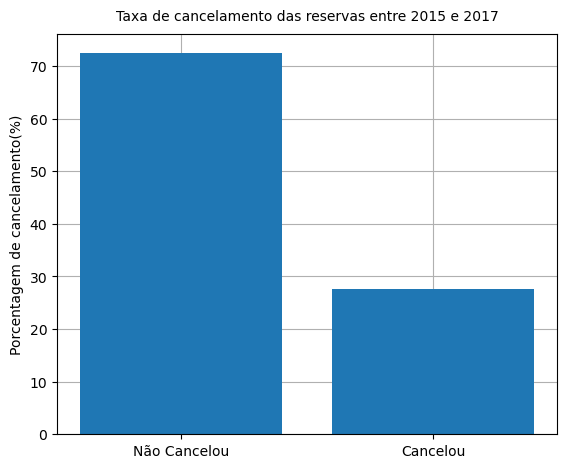

In [20]:
cancelamentos = dados['se_cancelou'].value_counts(normalize=True)*100
nome_cancelou = ['Não Cancelou', 'Cancelou']
cancelamentos.rename({'Canceled': 'Canceladas', 'Not_Canceled':'Não Canceladas'}, inplace=True)

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(cancelamentos))

eixo.bar(indice, cancelamentos)
eixo.set_title('Taxa de cancelamento das reservas entre 2015 e 2017', fontsize=10, pad=10)
eixo.set_ylabel('Porcentagem de cancelamento(%)', fontsize=10)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_cancelou)
eixo.grid(True)
eixo.set_axisbelow(True)

Quais são meses em que os hoteis e os resorts são mais frequentados?

Text(0.5, 1.0, 'Movimento por mês')

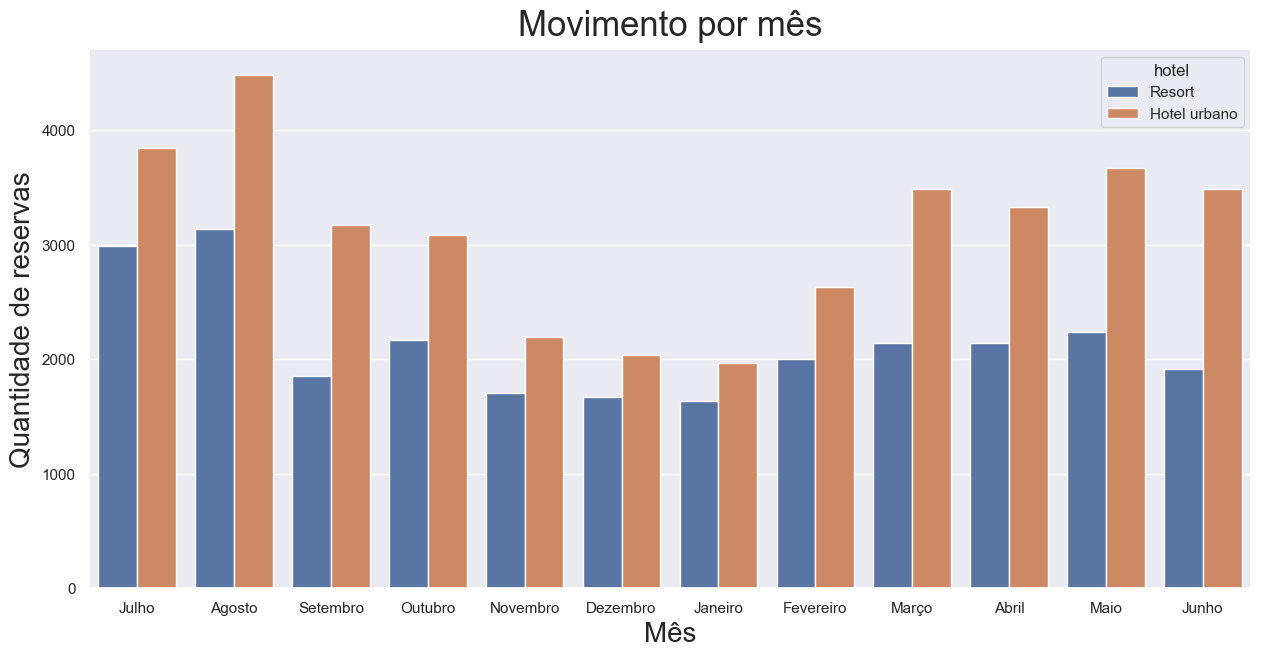

In [22]:
sns.countplot(x ='mes_da_viagem',hue='hotel', data = dados[(dados['se_cancelou'] == 0)],)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Mês', fontsize=20)
plt.ylabel('Quantidade de reservas', fontsize=20)
plt.title("Movimento por mês", fontsize=25, pad=10)

Como esperado, o verão foi o periodo com maior procura nos hoteis urbanos e nos resorts. Lembrando que são dados do hemisfério norte, portanto o verão ocorre entre junho e setembro.

Quais são países de origem?

In [23]:
top_paises = dados[(dados['se_cancelou'] == 0)]['pais'].value_counts().reset_index()
top_paises.columns =['pais','contagem']
top_paises = top_paises[:15]
top_paises

,pais,contagem
0,PRT,17653
1,GBR,8446
2,FRA,7104
3,ESP,5388
4,DEU,4332
5,IRL,2348
6,ITA,1990
7,BEL,1670
8,NLD,1561
9,USA,1416


Text(0.5, 1.0, 'Principais países de origem dos hóspedes')

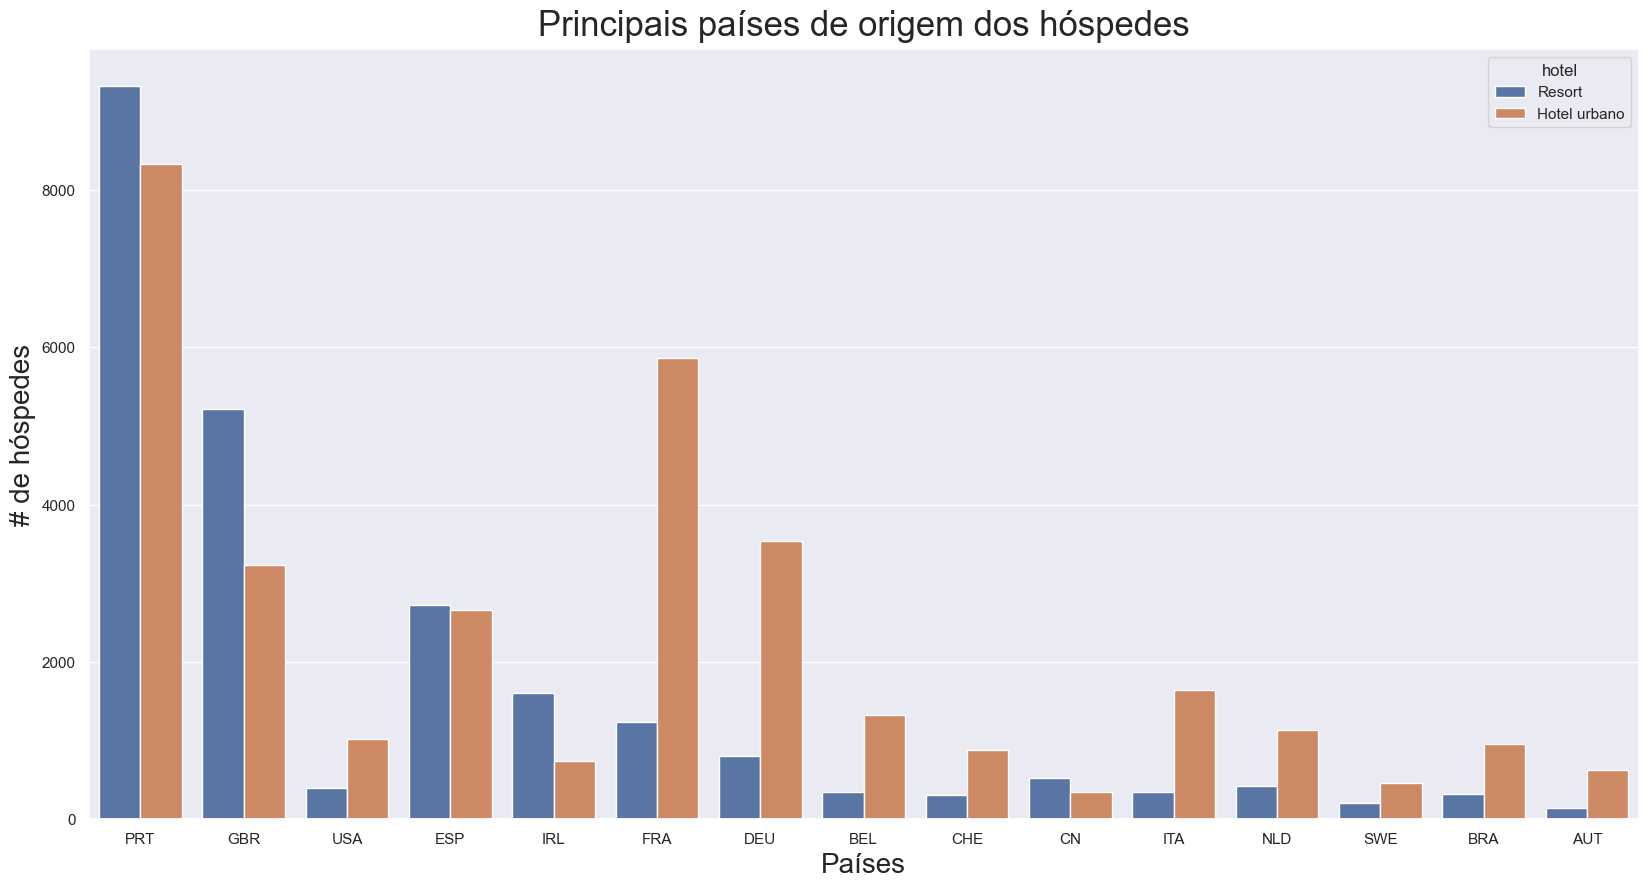

In [24]:
temp = dados[(dados['se_cancelou']==0)]
lista_de_paises=top_paises.pais.unique()
origem_dos_hospedes_por_tipo = temp[temp['pais'].isin(lista_de_paises)]

sns.countplot(x ='pais',hue='hotel', data = origem_dos_hospedes_por_tipo)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Países', fontsize=20)
plt.ylabel('# de hóspedes', fontsize=20)
plt.title("Principais países de origem dos hóspedes", fontsize=25, pad=10)

Correlações

In [25]:
correlacao = dados.corr()
correlacao

,se_cancelou,dias_entre_reserva_e_chegada,ano_da_viagem,semana_da_chegada,dia_da_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,criancas,bebes,se_hospede_recorrente,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,dias_na_lista_de_espera,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais,tamanho_da_familia,total_permacencia
se_cancelou,1.000000,0.183683,0.087745,0.000795,0.005227,0.059596,0.082778,0.080216,0.067010,-0.020950,-0.090171,0.050964,-0.050567,-0.094074,0.004297,0.126671,-0.183751,-0.121825,0.098807,0.083866
dias_entre_reserva_e_chegada,0.183683,1.000000,0.138796,0.100934,0.009778,0.233610,0.309869,0.137398,0.027675,-0.003882,-0.148050,0.005509,-0.076419,0.076704,0.132171,0.019698,-0.085796,0.032999,0.123693,0.317879
ano_da_viagem,0.087745,0.138796,1.000000,-0.514070,-0.010270,0.005022,0.003928,0.037441,0.040792,-0.023070,0.024048,-0.053985,0.028197,0.008742,-0.028191,0.176021,-0.038631,0.064358,0.049693,0.004801
semana_da_chegada,0.000795,0.100934,-0.514070,1.000000,0.093673,0.026072,0.027361,0.023784,0.013415,0.013666,-0.037281,0.006634,-0.020763,0.011457,0.013884,0.097733,0.008634,0.046171,0.028425,0.030106
dia_da_chegada,0.005227,0.009778,-0.010270,0.093673,1.000000,-0.017326,-0.027670,-0.001424,0.015834,-0.000784,-0.004411,-0.008692,0.000656,0.006488,0.006582,0.022164,0.008666,-0.001666,0.007877,-0.027062
no_de_noites_fds,0.059596,0.233610,0.005022,0.026072,-0.017326,1.000000,0.551196,0.086190,0.027800,0.013587,-0.107972,-0.020690,-0.054161,0.049017,-0.032031,0.035921,-0.042700,0.030384,0.085892,0.784223
no_de_noites_diadesemana,0.082778,0.309869,0.003928,0.027361,-0.027670,0.551196,1.000000,0.094298,0.030224,0.015958,-0.114698,-0.018914,-0.056944,0.084180,0.001788,0.050859,-0.044023,0.035396,0.094017,0.949973
adultos,0.080216,0.137398,0.037441,0.023784,-0.001424,0.086190,0.094298,1.000000,0.022383,0.016213,-0.173241,-0.042173,-0.117781,-0.049180,-0.016136,0.245238,0.009225,0.110711,0.803581,0.102388
criancas,0.067010,0.027675,0.040792,0.013415,0.015834,0.027800,0.030224,0.022383,1.000000,0.017551,-0.045912,-0.019143,-0.028486,0.030887,-0.020533,0.326300,0.037155,0.044366,0.595618,0.032882
bebes,-0.020950,-0.003882,-0.023070,0.013666,-0.000784,0.013587,0.015958,0.016213,0.017551,1.000000,-0.012993,-0.005326,-0.008859,0.080932,-0.006858,0.022779,0.030555,0.094607,0.165864,0.016953


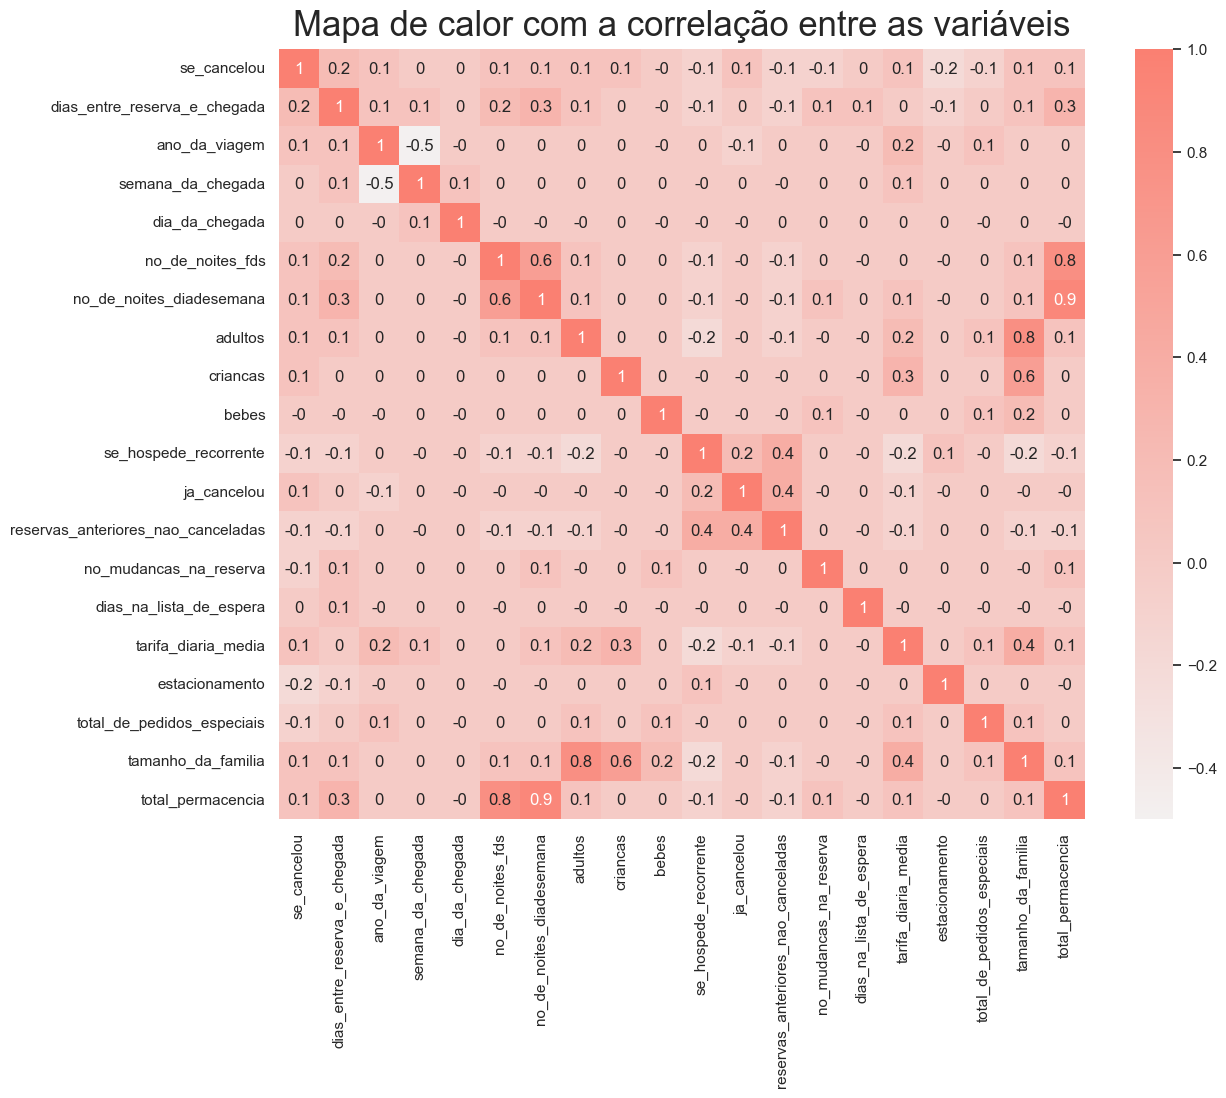

In [26]:
plt.figure(figsize=(13,10))
paleta = sns.color_palette('light:salmon', as_cmap=True)
sns.heatmap(correlacao.round(1), annot=True, cmap=paleta)
plt.title("Mapa de calor com a correlação entre as variáveis", fontsize=25, pad=10)
plt.savefig('mapacalor.png', format='png')
plt.show()

In [27]:
# detalhando a correlação de cada feature com a "se_cancelou"

dados.corr()['se_cancelou'].abs().sort_values(ascending=True)

semana_da_chegada                     0.000795
dias_na_lista_de_espera               0.004297
dia_da_chegada                        0.005227
bebes                                 0.020950
reservas_anteriores_nao_canceladas    0.050567
ja_cancelou                           0.050964
no_de_noites_fds                      0.059596
criancas                              0.067010
adultos                               0.080216
no_de_noites_diadesemana              0.082778
total_permacencia                     0.083866
ano_da_viagem                         0.087745
se_hospede_recorrente                 0.090171
no_mudancas_na_reserva                0.094074
tamanho_da_familia                    0.098807
total_de_pedidos_especiais            0.121825
tarifa_diaria_media                   0.126671
dias_entre_reserva_e_chegada          0.183683
estacionamento                        0.183751
se_cancelou                           1.000000
Name: se_cancelou, dtype: float64

# Preparando os dados para o modelo

In [28]:
dados.drop(['semana_da_chegada','dias_na_lista_de_espera', 'ano_da_viagem', 'mes_da_viagem', 'status_da_reserva', 'tipo_de_quarto_determinado'], axis=1, inplace=True)
dados.columns

Index(['hotel', 'se_cancelou', 'dias_entre_reserva_e_chegada',
       'dia_da_chegada', 'no_de_noites_fds', 'no_de_noites_diadesemana',
       'adultos', 'criancas', 'bebes', 'refeicao', 'pais', 'segmento',
       'canal_de_distribuicao', 'se_hospede_recorrente', 'ja_cancelou',
       'reservas_anteriores_nao_canceladas', 'tipo_de_quarto',
       'no_mudancas_na_reserva', 'tipo_de_deposito', 'tipo_de_reserva',
       'tarifa_diaria_media', 'estacionamento', 'total_de_pedidos_especiais',
       'data_do_ultimo_status', 'tamanho_da_familia', 'total_permacencia'],
      dtype='object')

In [29]:
# Separando a data em três colunas: ano, mês e dia. Isso irá facilitar as análises posteriores.

dados['data_do_ultimo_status'] = pd.to_datetime(dados['data_do_ultimo_status'])

dados['ano'] = dados['data_do_ultimo_status'].dt.year
dados['mes'] = dados['data_do_ultimo_status'].dt.month
dados['dia'] = dados['data_do_ultimo_status'].dt.day

dados.drop(['data_do_ultimo_status'], axis=1, inplace=True)

In [30]:
dados.dtypes

hotel                                  object
se_cancelou                             int64
dias_entre_reserva_e_chegada            int64
dia_da_chegada                          int64
no_de_noites_fds                        int64
no_de_noites_diadesemana                int64
adultos                                 int64
criancas                                int64
bebes                                   int64
refeicao                               object
pais                                   object
segmento                               object
canal_de_distribuicao                  object
se_hospede_recorrente                   int64
ja_cancelou                             int64
reservas_anteriores_nao_canceladas      int64
tipo_de_quarto                         object
no_mudancas_na_reserva                  int64
tipo_de_deposito                       object
tipo_de_reserva                        object
tarifa_diaria_media                   float64
estacionamento                    

In [31]:
# Diminuindo os valores únicos na coluna país a criação das variáveis dummy será mais simples

dados['pais'].nunique()
dados.loc[~dados["pais"].isin(lista_de_paises), "pais"] = "Other"
dados['pais'].value_counts()
dados['pais'].nunique()

16

In [32]:
dados['tipo_de_deposito'].nunique()
dados['refeicao'].nunique()
dados['tipo_de_reserva'].nunique()
dados['tipo_de_quarto'].nunique()

10

Criando as variáveis Dummies

In [33]:
dummies = pd.get_dummies(dados, columns=['hotel','refeicao','pais','segmento','canal_de_distribuicao','tipo_de_quarto','tipo_de_deposito','tipo_de_reserva'])
dummies

,se_cancelou,dias_entre_reserva_e_chegada,dia_da_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,criancas,bebes,se_hospede_recorrente,ja_cancelou,...,tipo_de_quarto_H,tipo_de_quarto_L,tipo_de_quarto_P,tipo_de_deposito_No Deposit,tipo_de_deposito_Non Refund,tipo_de_deposito_Refundable,tipo_de_reserva_Contract,tipo_de_reserva_Group,tipo_de_reserva_Transient,tipo_de_reserva_Transient-Party
0,0,342,1,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,1,0,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,1,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,30,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,31,2,5,3,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,31,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,31,2,5,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
dummies.drop(['dias_entre_reserva_e_chegada','no_de_noites_fds','no_de_noites_diadesemana','adultos','criancas','bebes',
              'ja_cancelou','reservas_anteriores_nao_canceladas','no_mudancas_na_reserva','tarifa_diaria_media',
              'estacionamento','total_de_pedidos_especiais','total_permacencia','tamanho_da_familia'], axis=1, inplace=True)

In [35]:
dummies

,se_cancelou,dia_da_chegada,se_hospede_recorrente,ano,mes,dia,hotel_Hotel urbano,hotel_Resort,refeicao_BB,refeicao_FB,...,tipo_de_quarto_H,tipo_de_quarto_L,tipo_de_quarto_P,tipo_de_deposito_No Deposit,tipo_de_deposito_Non Refund,tipo_de_deposito_Refundable,tipo_de_reserva_Contract,tipo_de_reserva_Group,tipo_de_reserva_Transient,tipo_de_reserva_Transient-Party
0,0,1,0,2015,7,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,2015,7,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,2015,7,2,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,2015,7,2,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,2015,7,3,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,30,0,2017,9,6,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,31,0,2017,9,7,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


Dados com muita variação precisam ser normalizados para que os modelos sejam mais eficientes

In [36]:
# verificando se existe muita variação no dataset

dados.var().sort_values(ascending=False).head(30)

C:\Users\eders\AppData\Local\Temp\ipykernel_3472\1216494461.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dados.var().sort_values(ascending=False).head(30)


dias_entre_reserva_e_chegada          7413.709808
tarifa_diaria_media                   3020.557642
dia_da_chegada                          78.049088
dia                                     77.307364
mes                                     10.418653
total_permacencia                        7.553911
no_de_noites_diadesemana                 4.177363
reservas_anteriores_nao_canceladas       2.952003
no_de_noites_fds                         1.058473
total_de_pedidos_especiais               0.692024
tamanho_da_familia                       0.630246
no_mudancas_na_reserva                   0.530242
ano                                      0.462696
adultos                                  0.391727
criancas                                 0.208710
se_cancelou                              0.199799
ja_cancelou                              0.136626
estacionamento                           0.078646
se_hospede_recorrente                    0.037706
bebes                                    0.012885


In [37]:
# como existe uma grade variação, normalizei as colunas indicadas

dados_a_normalizar=dados.loc[:, ['dias_entre_reserva_e_chegada','no_de_noites_fds','no_de_noites_diadesemana','adultos','criancas','bebes',
              'ja_cancelou','reservas_anteriores_nao_canceladas','no_mudancas_na_reserva','tarifa_diaria_media',
              'estacionamento','total_de_pedidos_especiais']] 

In [38]:
dados_normalizados=(dados_a_normalizar-dados_a_normalizar.min())/(dados_a_normalizar.max()-dados_a_normalizar.min())
dados_normalizados

,dias_entre_reserva_e_chegada,no_de_noites_fds,no_de_noites_diadesemana,adultos,criancas,bebes,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais
0,0.464043,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,1.000000,0.000,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0.009498,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0.017639,0.000,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0.018996,0.000,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0.138399,0.125,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0.046133,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0.147897,0.125,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


In [39]:
dados_final = pd.merge(dummies,dados_normalizados , left_index=True, right_index=True)
dados_final

,se_cancelou,dia_da_chegada,se_hospede_recorrente,ano,mes,dia,hotel_Hotel urbano,hotel_Resort,refeicao_BB,refeicao_FB,...,no_de_noites_diadesemana,adultos,criancas,bebes,ja_cancelou,reservas_anteriores_nao_canceladas,no_mudancas_na_reserva,tarifa_diaria_media,estacionamento,total_de_pedidos_especiais
0,0,1,0,2015,7,1,0,1,1,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.142857,0.001180,0.0,0.0
1,0,1,0,2015,7,1,0,1,1,0,...,0.000000,0.036364,0.0,0.0,0.0,0.0,0.190476,0.001180,0.0,0.0
2,0,1,0,2015,7,2,0,1,1,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
3,0,1,0,2015,7,2,0,1,1,0,...,0.024390,0.018182,0.0,0.0,0.0,0.0,0.000000,0.015053,0.0,0.0
4,0,1,0,2015,7,3,0,1,1,0,...,0.048780,0.036364,0.0,0.0,0.0,0.0,0.000000,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,30,0,2017,9,6,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.018963,0.0,0.0
119386,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.054545,0.0,0.0,0.0,0.0,0.000000,0.042877,0.0,0.4
119387,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.030351,0.0,0.8
119388,0,31,0,2017,9,7,1,0,1,0,...,0.121951,0.036364,0.0,0.0,0.0,0.0,0.000000,0.020491,0.0,0.0


# Regressão logística

In [40]:
# definindo as variáveis dependentes e independentes

Y=dados_final['se_cancelou']
X=dados_final.drop(['se_cancelou'], axis=1)

In [41]:
# criando os sets de treino e de teste

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=10000)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [43]:
# avaliando a acurácia do modelo proposto

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     18949
           1       0.65      0.41      0.50      7126

    accuracy                           0.78     26075
   macro avg       0.73      0.66      0.68     26075
weighted avg       0.76      0.78      0.76     26075



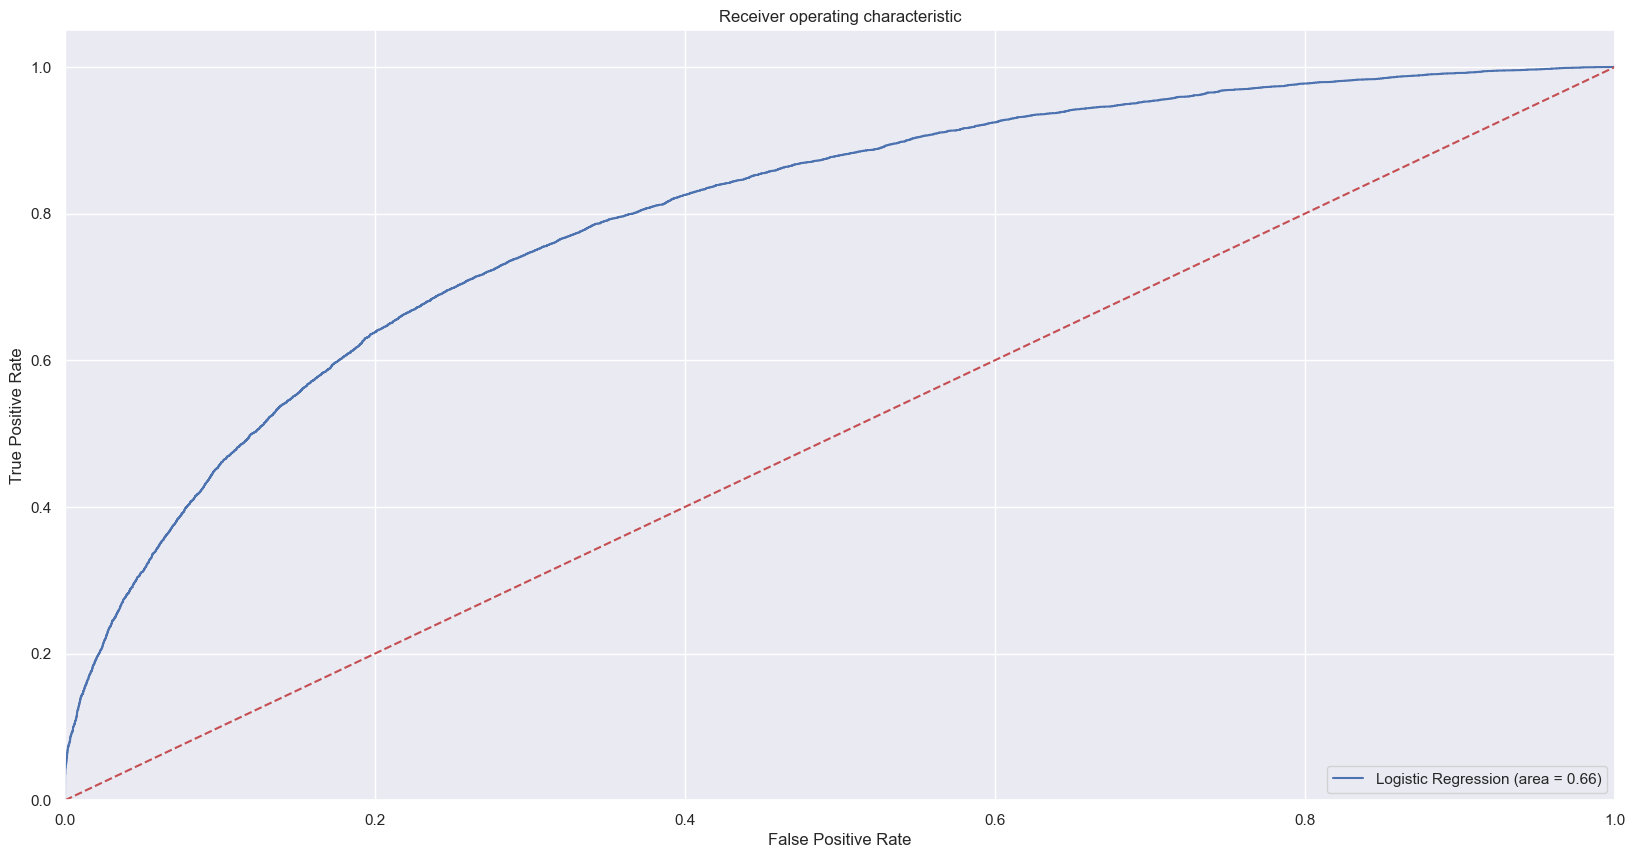

In [44]:
# visualizando de uma maneira visual a acurácia. Quanto mais afastada da linha vermelha a azul estiver, melhor.

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, model.predict(x_test_data))
fpr, tpr, thresholds = roc_curve(y_test_data, model.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [46]:
rfr = RandomForestRegressor()
rfr.fit(x_training_data, y_training_data)
rfr_pred = rfr.predict(x_test_data)

In [49]:
score = rfr.score(x_training_data,y_training_data)
score

0.9507989163565641

In [50]:
from sklearn.metrics import r2_score

y_pred5 = rfr.predict(x_test_data)
rscore=r2_score(y_test_data, y_pred5)
rscore

0.6472159800824071

In [51]:
print(f'O modelo de Random Forest obteve uma acurácia de {rscore*100}.')

O modelo de Random Forest obteve uma acurácia de 64.7215980082407.


## O modelo de Regressão Lógica se mostrou mais acurado (78%) do que o de Random forest (65%) para prever se um hóspede irá ou não cancelar a reserva